In [40]:
from functools import wraps # This convenience func preserves name and docstring
import matplotlib
import matplotlib.pyplot as plt

def _add_method(cls):
    def decorator(func):
        @wraps(func) 
        def wrapper(self, *args, **kwargs): 
            return func(*args, **kwargs)
        setattr(cls, func.__name__, wrapper)
        # Note we are not binding func, but wrapper which accepts self but does exactly the same as func
        return func # returning func means func can still be used normally
    return decorator


# override __add__ method in Figure object
@_add_method(matplotlib.figure.Figure)
def __add__(self, other):
    # load ax from first fig
    ax_list_1 = self.axes

    # load ax from second fig
    ax_list_2 = other.axes

    ax_list = ax_list_1 + ax_list_2
    n = len(ax_list)

    fig, ax = plt.subplots(1,n) 

    # create new figure with subplots
    for i, ax_i in enumerate(ax_list):
#         ax[i] = ax_i
        ax[i].update_from(ax_i)
        print(ax[i])

    # return figure
    return fig, ax

# @_add_method(matplotlib.figure.Figure)
# def __radd__(self):
# #     return self.__add__(other)
#     return None

# test using only images

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
dpi = 300

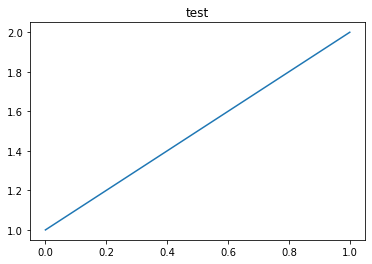

In [108]:
import io
from PIL import Image

plt.figure()
plt.plot([1, 2])
plt.title("test")
buf = io.BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1, dpi=dpi)
buf.seek(0)
im = Image.open(buf)
# im.show()
# buf.close()

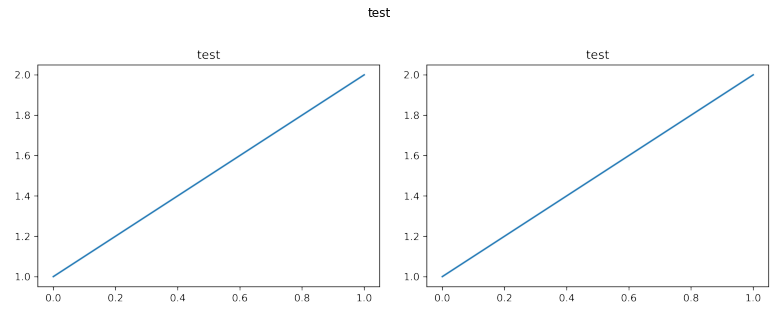

In [109]:
fig, ax = plt.subplots(1,2, figsize=(im.width/dpi*1.35*2,im.height/dpi*1.35))

ax[0].imshow(im)
ax[0].axis('off')
ax[1].imshow(im)
ax[1].axis('off')
fig.subplots_adjust(wspace=0, hspace=0)
fig.suptitle('test')

plt.show()

In [53]:
from functools import wraps # This convenience func preserves name and docstring
import matplotlib
import matplotlib.pyplot as plt
import pickle
import io

def _add_method(cls):
    def decorator(func):
        @wraps(func) 
        def wrapper(self, *args, **kwargs): 
            return func(*args, **kwargs)
        setattr(cls, func.__name__, wrapper)
        # Note we are not binding func, but wrapper which accepts self but does exactly the same as func
        return func # returning func means func can still be used normally
    return decorator


# override __add__ method in Figure object
@_add_method(matplotlib.figure.Figure)
def __add__(self, other):
    # load ax from first fig
    ax_list_1 = self.axes

    # load ax from second fig
    ax_list_2 = other.axes

    ax_list = ax_list_1 + ax_list_2
    n = len(ax_list)

    fig, ax = plt.subplots(1,n) 

    # create new figure with subplots
    for i, ax_i in enumerate(ax_list):
        buf = io.BytesIO()
        pickle.dump(ax_i, buf)
        buf.seek(0)
        ax_p = pickle.load(buf) 
        ax[i] = ax_p
        print(ax_p)

    # return figure
    return fig, ax

# @_add_method(matplotlib.figure.Figure)
# def __radd__(self):
# #     return self.__add__(other)
#     return None

In [54]:
tt = plt.figure()

<Figure size 432x288 with 0 Axes>

In [55]:
tt.canvas.manager.canvas.figure = fig1
tt.canvas.manager.canvas.figure.add_axes(ax1)

<AxesSubplot:title={'center':'#1 About as simple as it gets, folks'}, xlabel='time (s)', ylabel='voltage (mV)'>

In [56]:
tt

<Figure size 432x288 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt

fig1, ax = plt.subplots()
ax.plot(range(10))
ax.remove()

fig2 = plt.figure()
ax.figure=fig2
fig2.axes.append(ax)
fig2.add_axes(ax)

dummy = fig2.add_subplot(111)
ax.set_position(dummy.get_position())
dummy.remove()
plt.close(fig1)

plt.show()

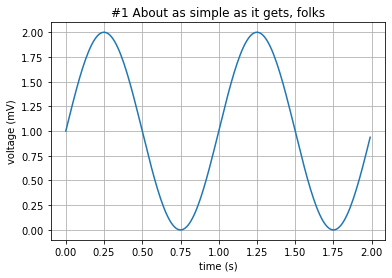

In [71]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

f1, a1 = plt.subplots()
a1.plot(t, s)

a1.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='#1 About as simple as it gets, folks')
a1.grid()

NotImplementedError: TransformNode instances can not be copied. Consider using frozen() instead.

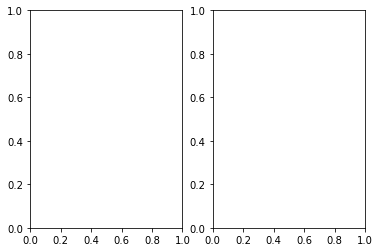

In [74]:
from copy import deepcopy as dcopy

a1.remove()

figf, af = plt.subplots(1,2)
at = dcopy(a1)

at.figure = figf

figf.axes.append(at)
figf.add_axes(at)

# dummy = figf.add_subplots(1,2)
dummy = figf.subplots(1,2)
at.set_position(dummy.get_position())
dummy.remove()
plt.close(f1)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'get_position'

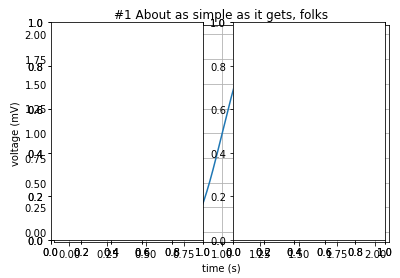

In [73]:
a1.remove()

figf, af = plt.subplots(1,2)
a1.figure = figf
figf.axes.append(a1)
figf.add_axes(a1)

# dummy = figf.add_subplots(1,2)
dummy = figf.subplots(1,2)
a1.set_position(dummy.get_position())
dummy.remove()
plt.close(f1)

plt.show()

In [59]:
ax

<AxesSubplot:>

In [8]:
def make_manager(fig):
    # create a dummy figure and use its
    # manager to display "fig"  ; based on https://stackoverflow.com/a/54579616/8508004
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

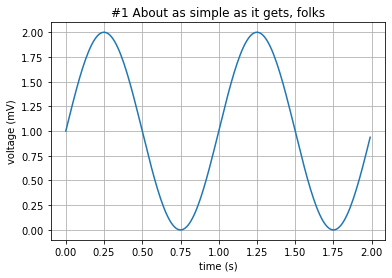

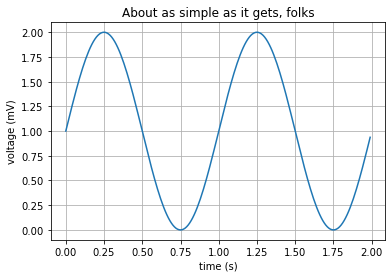

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

f1, a1 = plt.subplots()
a1.plot(t, s)

a1.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='#1 About as simple as it gets, folks')
a1.grid()

f2, a2 = plt.subplots()
a2.plot(t, s)

a2.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
a2.grid()

In [5]:
fig1.axes

[<AxesSubplot:title={'center':'About as simple as it gets, folks'}, xlabel='time (s)', ylabel='voltage (mV)'>]

In [29]:
# fig3, ax3 = plt.subplots(1,2)

# ax3[0] = fig1.axes[0]
# fig3.show()
# make_manager(fig3)

Text(0.5, 0.98, 'test')

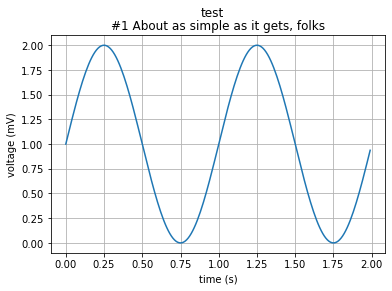

In [30]:
import io
import pickle

buf = io.BytesIO()
pickle.dump(fig1, buf)
buf.seek(0)
fig3 = pickle.load(buf)

# fig3 = fig1
make_manager(fig3)
fig3.suptitle('test')

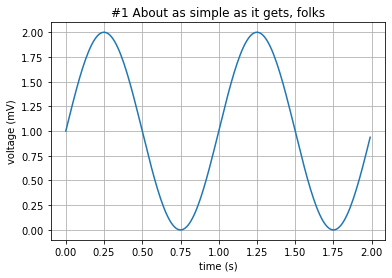

In [31]:
fig1

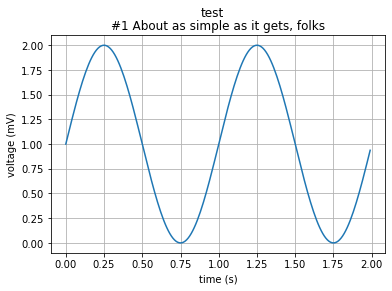

In [32]:
fig3

In [33]:
fig3.axes

[<AxesSubplot:title={'center':'#1 About as simple as it gets, folks'}, xlabel='time (s)', ylabel='voltage (mV)'>]

<AxesSubplot:>

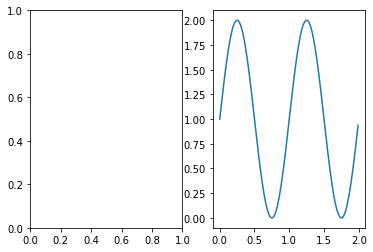

In [41]:
fig4, ax4 = plt.subplots(1,2)

fig4.axes.append(fig3.axes[0])
ax4[1].plot(t, s)
# make_manager(fig4)

fig4.axes[0]

In [45]:
fig3.axes[0]

<AxesSubplot:title={'center':'#1 About as simple as it gets, folks'}, xlabel='time (s)', ylabel='voltage (mV)'>

<AxesSubplot:title={'center':'#1 About as simple as it gets, folks'}, xlabel='time (s)', ylabel='voltage (mV)'>

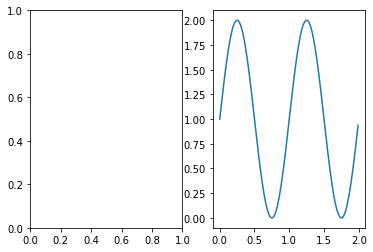

In [47]:
fig4, ax4 = plt.subplots(1,2)

ax4[0] = fig3.axes[0]
ax4[1].plot(t, s)
# make_manager(fig4)
ax4[0]